In [2]:
# default libs
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# geo dfs
import pandas as pd
import geopandas as gpd
import contextily as cx

In [3]:
nwb = gpd.read_file("..\\data\\nwb_wegen.gpkg", engine='pyogrio', use_arrow=True)
nwb = nwb[nwb['gme_naam'] == 'Utrecht']
nwb.head()

c:\Users\flori\!projects\noise-these\noise-thesis\.venv\Lib\site-packages\pyogrio\raw.py:287: UserWarning: More than one layer found in 'nwb_wegen.gpkg': 'wegvakken' (default), 'hectopunten'. Specify layer parameter to avoid this warning.
  with open_arrow(


,objectid,wvk_id,wvk_begdat,jte_id_beg,jte_id_end,wegbehsrt,wegnummer,wegdeelltr,hecto_lttr,bst_code,...,bronjaar,openlr,bag_orl,frc,fow,alt_naam,alt_nr,rel_hoogte,st_lengthshape,geometry
41,42,273314084.0,1998-06-26 00:00:00+00:00,273314118.0,273314119.0,G,,#,#,,...,1996.0,CwOjxSUM6DPIAAAH//8zGA==,0344300000003206,6,3,,,NaN,5.099020,"MULTILINESTRING ((136579.000 457133.000, 13658..."
123,124,259314007.0,2002-07-01 00:00:00+00:00,259314035.0,259314043.0,G,,#,#,,...,1999.0,CwOSISUNUTPEAAAzACEzEw==,0344300000002240,6,3,,,NaN,50.813576,"MULTILINESTRING ((129941.000 457412.000, 12997..."
132,133,271302003.0,2002-10-01 00:00:00+00:00,271302058.0,271302064.0,G,,#,#,,...,1999.0,CwOhiSUDmCumAABCAA8rFg==,0344300000003229,5,3,,,NaN,47.759816,"MULTILINESTRING ((135717.000 451446.000, 13576..."
134,135,260315038.0,2002-10-01 00:00:00+00:00,260315016.0,260315024.0,G,,#,#,,...,1999.0,CwOSVSUNyDPJAAAc//wzGQ==,0344300000003128,6,3,,,NaN,19.646883,"MULTILINESTRING ((130019.000 457696.000, 13003..."
272,273,261314061.0,2010-04-01 00:00:00+00:00,261314042.0,261314041.0,G,,#,#,,...,2008.0,CwOUPCUNdDPPAAAB/+gzHw==,0344300000001733,6,3,,,NaN,26.590348,"MULTILINESTRING ((130734.668 457491.549, 13073..."


In [4]:
aud = gpd.read_file("gdf_aud.gpkg", engine='pyogrio', use_arrow=True)
aud.head()

,DateTime,Longitude,Latitude,speed,DbA,DbA_adjusted_ols,is_fast,geometry
0,2024-05-08 08:14:45+00:00,5.182616,52.090183,24.445303,81.086515,68.121409,False,POINT (140978.895 455789.077)
1,2024-05-08 08:14:46+00:00,5.182682,52.090099,26.134887,80.752247,66.891032,False,POINT (140983.369 455779.691)
2,2024-05-08 08:14:47+00:00,5.182701,52.090000,30.396279,82.491447,66.370108,True,POINT (140984.610 455768.702)
3,2024-05-08 08:14:48+00:00,5.182719,52.089902,26.152667,85.747267,71.876622,False,POINT (140985.829 455757.740)
4,2024-05-08 08:14:49+00:00,5.182782,52.089818,25.002250,83.261453,70.000957,False,POINT (140990.104 455748.375)


In [42]:
tp = aud['geometry'][0]
nwb['geometry'].sindex.nearest(tp)

array([[    0],
       [15814]], dtype=int64)

In [46]:
nwb.iloc[15814]

objectid                                                    1106631
wvk_id                                                  600409370.0
wvk_begdat                                2020-09-01 00:00:00+00:00
jte_id_beg                                              600099394.0
jte_id_end                                              600099403.0
wegbehsrt                                                         G
wegnummer                                                          
wegdeelltr                                                        #
hecto_lttr                                                        #
bst_code                                                         BU
rpe_code                                                          #
admrichtng                                                         
rijrichtng                                                        B
stt_naam                                             Heidelberglaan
stt_bron                                        

In [51]:
tl = nwb.iloc[15814]['geometry']
tdf = gpd.GeoDataFrame(data={'color':[0,1]}, geometry=[tp, tl], crs=aud.crs)
tdf.explore()

In [5]:
mdf = nwb.copy()
mdf['measurements'] = [[] for i in range(mdf.shape[0])]

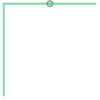

In [30]:
from shapely import LineString, Point, GeometryCollection
GeometryCollection([LineString([(0, 0), (0, 1), (1, 1)]),Point(0.5,1)])

In [35]:
LineString([(0, 0), (0, 1), (1, 1)]).project(Point(0.1,0.6))

0.6

In [23]:
from shapely import distance
aud = aud.to_crs(nwb.crs)
for i, r in mdf.iterrows():
    for j, s in aud.iterrows():
        if distance(r['geometry'], s['geometry']) > 30: continue
        mdf['measurements'][i].append(s['DbA_adjusted_ols'])
        

KeyboardInterrupt: 

In [21]:
for i, r in mdf.iterrows():
    if i > 200: break
    print(i)

In [22]:
mdf

,objectid,wvk_id,wvk_begdat,jte_id_beg,jte_id_end,wegbehsrt,wegnummer,wegdeelltr,hecto_lttr,bst_code,...,openlr,bag_orl,frc,fow,alt_naam,alt_nr,rel_hoogte,st_lengthshape,geometry,measurements
41,42,273314084.0,1998-06-26 00:00:00+00:00,273314118.0,273314119.0,G,,#,#,,...,CwOjxSUM6DPIAAAH//8zGA==,0344300000003206,6,3,,,NaN,5.099020,"MULTILINESTRING ((136579.000 457133.000, 13658...",[nan]
123,124,259314007.0,2002-07-01 00:00:00+00:00,259314035.0,259314043.0,G,,#,#,,...,CwOSISUNUTPEAAAzACEzEw==,0344300000002240,6,3,,,NaN,50.813576,"MULTILINESTRING ((129941.000 457412.000, 12997...",[]
132,133,271302003.0,2002-10-01 00:00:00+00:00,271302058.0,271302064.0,G,,#,#,,...,CwOhiSUDmCumAABCAA8rFg==,0344300000003229,5,3,,,NaN,47.759816,"MULTILINESTRING ((135717.000 451446.000, 13576...",[]
134,135,260315038.0,2002-10-01 00:00:00+00:00,260315016.0,260315024.0,G,,#,#,,...,CwOSVSUNyDPJAAAc//wzGQ==,0344300000003128,6,3,,,NaN,19.646883,"MULTILINESTRING ((130019.000 457696.000, 13003...",[]
272,273,261314061.0,2010-04-01 00:00:00+00:00,261314042.0,261314041.0,G,,#,#,,...,CwOUPCUNdDPPAAAB/+gzHw==,0344300000001733,6,3,,,NaN,26.590348,"MULTILINESTRING ((130734.668 457491.549, 13073...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550867,1550866,267313011.0,2024-02-01 00:00:00+00:00,267313017.0,267313006.0,G,,#,#,FP,...,CwOcJiUL5T//Af/fAFQ/Cw==,0344300000001275,7,7,,,NaN,100.733977,"MULTILINESTRING ((133708.418 456527.053, 13370...",[]
1550891,1550890,601005514.0,2023-02-01 00:00:00+00:00,600380383.0,600380382.0,G,,#,#,,...,CwOiRSUJmzPVAP/v//ozBQ==,0344300000003579,6,3,,,NaN,12.892060,"MULTILINESTRING ((136006.815 455117.409, 13600...",[]
1550942,1550943,271313095.0,2020-12-01 00:00:00+00:00,271313170.0,271313171.0,G,,#,#,,...,CwOhySUMkzPCAAAYABIzEw==,0344300000001081,6,3,,,NaN,27.265661,"MULTILINESTRING ((135831.597 456933.791, 13583...",[]
1551025,1551025,600478340.0,2022-01-01 00:00:00+00:00,260307101.0,600138744.0,R,012,R,a,AFR,...,CwOSviUHrA4pBQHS/58OGQ==,,1,6,,,NaN,337.170006,"MULTILINESTRING ((130155.480 453962.098, 13018...",[]
